In [10]:
import torch
import copy

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from BO import BayesianOptimizer

Crossed Barrel:

In [43]:
kappa = 20
raw_dataset = pd.read_csv("CrossedBarrel_dataset.csv")
feature_name = list(raw_dataset.columns)[:-1]
objective_name = list(raw_dataset.columns)[-1]
ds = copy.deepcopy(raw_dataset)
ds_grouped = ds.groupby(feature_name)[objective_name].agg(lambda x: x.unique().mean())
ds_grouped = (ds_grouped.to_frame()).reset_index()
X_feature = ds_grouped[feature_name].values

y = np.array(ds_grouped[objective_name].values)
assert len(ds_grouped) == len(X_feature) == len(y)
ch2xy = torch.from_numpy(X_feature).float()
response = torch.from_numpy(y).float()

response = (response - response.min()) / (response.max() - response.min())
print(ch2xy.shape, response.shape)

torch.Size([600, 4]) torch.Size([600])


In [31]:
opt = BayesianOptimizer(ch2xy, response)
regret_bo, baseline = opt.train(
    kappa,
    initial_points=1,
    repetitions=30,
    iterations=150,
    strategy="Vanilla BO",
)
regret_mpbo, _ = opt.train(
    kappa,
    repetitions=30,
    iterations=150,
    strategy="MP-BO",
    begin_strat=20,
    initial_points=20,
    follow_baseline=baseline,
)

  3%|▎         | 1/30 [00:02<01:01,  2.12s/it]/Users/maximemoutet/.pyenv/versions/3.12.2/envs/venv-internship/lib/python3.12/site-packages/gpytorch/distributions/multivariate_normal.py:319: NumericalWarning: Negative variance values detected. This is likely due to numerical instabilities. Rounding negative variances up to 1e-06.
  warnings.warn(
100%|██████████| 30/30 [00:56<00:00,  1.87s/it]


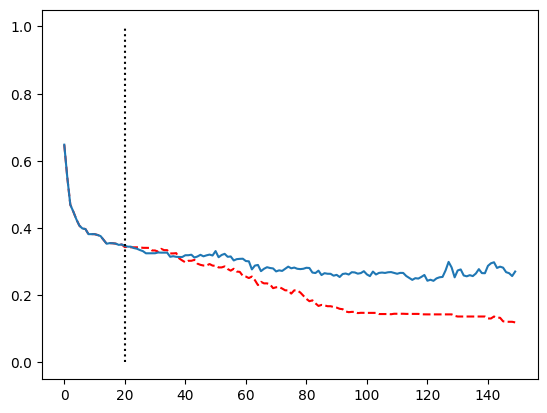

In [33]:
plt.plot(regret_bo.mean(0), color="r", linestyle="--", label="Vanilla BO")
plt.plot(regret_mpbo.mean(0), color="tab:blue", label="MP-BO")
plt.vlines(20, 0, 1, color="k", linestyle="dotted", label="q*=20")

AgNP:

In [52]:
kappa = 5
raw_dataset = pd.read_csv("AgNP_dataset.csv")
feature_name = list(raw_dataset.columns)[:-1]
objective_name = list(raw_dataset.columns)[-1]
ds = copy.deepcopy(raw_dataset)
ds_grouped = ds.groupby(feature_name)[objective_name].agg(lambda x: x.unique().mean())
ds_grouped = (ds_grouped.to_frame()).reset_index()
X_feature = ds_grouped[feature_name].values

y = -np.array(ds_grouped[objective_name].values)
assert len(ds_grouped) == len(X_feature) == len(y)
ch2xy = torch.from_numpy(X_feature).float()
response = torch.from_numpy(y).float()

response = (response - response.min()) / (response.max() - response.min())

print(ch2xy.shape, response.shape)

torch.Size([164, 5]) torch.Size([164])


In [53]:
opt = BayesianOptimizer(ch2xy, response)
regret_bo, baseline = opt.train(
    kappa,
    initial_points=1,
    repetitions=30,
    iterations=150,
    strategy="Vanilla BO",
)
regret_mpbo, _ = opt.train(
    kappa,
    repetitions=30,
    iterations=150,
    strategy="MP-BO",
    begin_strat=20,
    initial_points=20,
    follow_baseline=baseline,
)

100%|██████████| 30/30 [00:44<00:00,  1.49s/it]


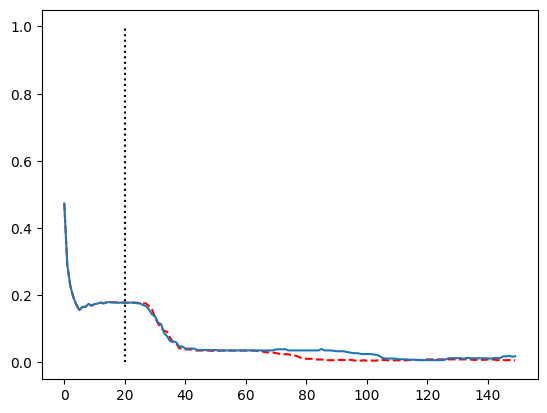

In [54]:
plt.plot(regret_bo.mean(0), color="r", linestyle="--", label="Vanilla BO")
plt.plot(regret_mpbo.mean(0), color="tab:blue", label="MP-BO")
plt.vlines(20, 0, 1, color="k", linestyle="dotted", label="q*=20")

Perovskite:

In [60]:
kappa = 5
raw_dataset = pd.read_csv("Perovskite_dataset.csv")
feature_name = list(raw_dataset.columns)[:-1]
objective_name = list(raw_dataset.columns)[-1]
ds = copy.deepcopy(raw_dataset)
ds_grouped = ds.groupby(feature_name)[objective_name].agg(lambda x: x.unique().mean())
ds_grouped = (ds_grouped.to_frame()).reset_index()
X_feature = ds_grouped[feature_name].values

y = -np.array(ds_grouped[objective_name].values)
assert len(ds_grouped) == len(X_feature) == len(y)
ch2xy = torch.from_numpy(X_feature).float()
response = torch.from_numpy(y).float()

response = (response - response.min()) / (response.max() - response.min())

print(ch2xy.shape, response.shape)
print(response)

torch.Size([94, 3]) torch.Size([94])
tensor([0.0000, 0.1134, 0.2266, 0.3539, 0.6732, 0.7882, 0.8277, 0.8840, 0.7807,
        0.9254, 0.9236, 0.8525, 0.9171, 0.8513, 0.9515, 0.9497, 0.9788, 0.9575,
        0.9196, 0.9282, 0.8191, 0.8983, 0.9678, 0.8592, 0.9204, 0.9158, 1.0000,
        0.9297, 0.8635, 0.8731, 0.9547, 0.8956, 0.9326, 0.8093, 0.9917, 0.7015,
        0.4038, 0.6753, 0.7078, 0.9030, 0.9512, 0.9042, 0.8418, 0.6358, 0.7034,
        0.7558, 0.9040, 0.5142, 0.7591, 0.7124, 0.8319, 0.4616, 0.5271, 0.7500,
        0.9905, 0.7269, 0.7779, 0.9260, 0.8345, 0.8925, 0.8735, 0.9347, 0.9260,
        0.8422, 0.8084, 0.8740, 0.1949, 0.4438, 0.7887, 0.7955, 0.8302, 0.8611,
        0.8119, 0.6849, 0.6339, 0.8354, 0.8180, 0.6754, 0.7111, 0.9380, 0.8341,
        0.8704, 0.8542, 0.8588, 0.7244, 0.7560, 0.8792, 0.7560, 0.8613, 0.7350,
        0.6809, 0.6807, 0.7737, 0.8451])


In [61]:
opt = BayesianOptimizer(ch2xy, response)
regret_bo, baseline = opt.train(
    kappa,
    initial_points=1,
    repetitions=30,
    iterations=150,
    strategy="Vanilla BO",
)
regret_mpbo, _ = opt.train(
    kappa,
    repetitions=30,
    iterations=150,
    strategy="MP-BO",
    begin_strat=30,
    initial_points=30,
    follow_baseline=baseline,
)

100%|██████████| 30/30 [00:45<00:00,  1.51s/it]


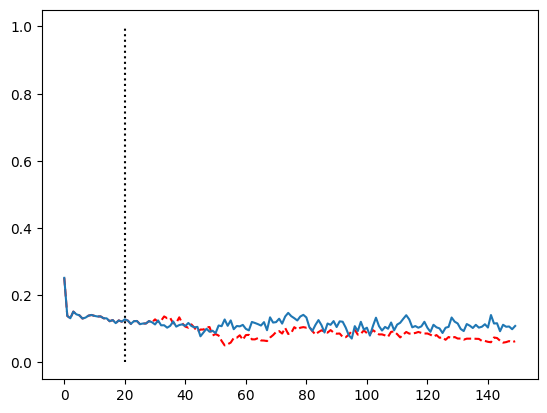

In [62]:
plt.plot(regret_bo.mean(0), color="r", linestyle="--", label="Vanilla BO")
plt.plot(regret_mpbo.mean(0), color="tab:blue", label="MP-BO")
plt.vlines(20, 0, 1, color="k", linestyle="dotted", label="q*=20")